In [1]:
from Dijkstra import Neo4jConnection, Graph
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
neo4j_conn = Neo4jConnection(
    uri="neo4j+s://ef6a4b43.databases.neo4j.io",
    user="neo4j",
    pwd="NGc-axA6NfD4lLYYgOS6EuxlNK-Fi8MrV41-bQep68I"
)

In [3]:
graph = Graph(neo4j_conn=neo4j_conn)
for v in ['A', 'B', 'C', 'D', 'E']:
    graph.add_vertex(v)

In [4]:
edges = [
    ('A', 'B', 4),
    ('A', 'C', 1),
    ('C', 'B', 2),
    ('B', 'D', 5),
    ('C', 'D', 8),
    ('D', 'E', 6)
]

In [5]:
for from_data, to_data, weight in edges:
    graph.add_edge(from_data, to_data, weight)

In [6]:
graph.save_graph_to_neo4j()

In [7]:
df_result = graph.dijkstra('A')
df_result

,Current Node,Visited Nodes,Distances
0,A,[A],"{'A': 0, 'B': 4, 'C': 1, 'D': inf, 'E': inf}"
1,C,"[A, C]","{'A': 0, 'B': 3, 'C': 1, 'D': 9, 'E': inf}"
2,B,"[A, B, C]","{'A': 0, 'B': 3, 'C': 1, 'D': 8, 'E': inf}"
3,D,"[A, B, C, D]","{'A': 0, 'B': 3, 'C': 1, 'D': 8, 'E': 14}"
4,E,"[A, B, C, D, E]","{'A': 0, 'B': 3, 'C': 1, 'D': 8, 'E': 14}"


In [8]:
# Tìm đường đi ngắn nhất từ A đến E
path = []
current_vertex = graph.vertices['E']
while current_vertex:
    path.insert(0, current_vertex.data)
    current_vertex = current_vertex.previous

# Lưu đường đi ngắn nhất vào Neo4j
graph.save_shortest_path_to_neo4j(path)

# Xây dựng danh sách các cạnh của đường đi ngắn nhất
shortest_path_edges = []
for i in range(len(path) - 1):
    shortest_path_edges.append((path[i], path[i+1]))

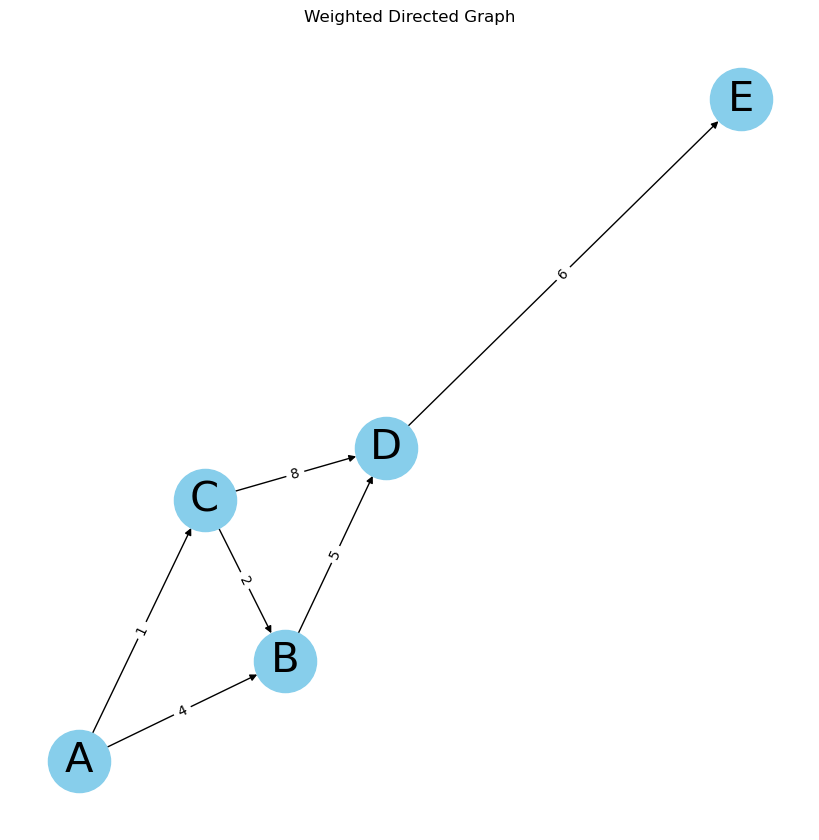

In [9]:
# Vẽ đồ thị ban đầu
plt.figure(figsize=(8, 8))
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

# Vị trí các nút trong đồ thị
pos = nx.spring_layout(G)

# Vẽ nút và cạnh của đồ thị ban đầu
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Tiêu đề đồ thị ban đầu
plt.title("Weighted Directed Graph")
plt.show()

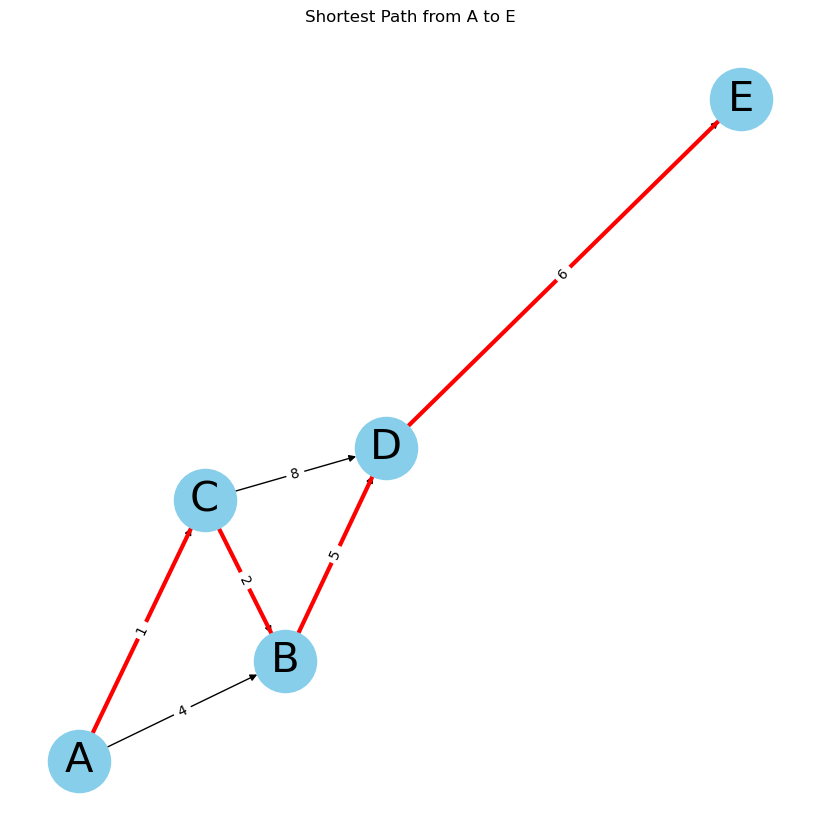

Shortest path from A to E: A -> C -> B -> D -> E


In [10]:
# Vẽ lại đồ thị với đường đi ngắn nhất nổi bật
plt.figure(figsize=(8, 8))

# Vẽ nút và cạnh của đồ thị
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)

# Vẽ các cạnh của đường đi ngắn nhất với màu sắc khác
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='r', width=3)

# Vẽ nhãn cạnh
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Tiêu đề đồ thị với đường đi ngắn nhất
plt.title("Shortest Path from A to E")
plt.show()

# In ra đường đi ngắn nhất
print("Shortest path from A to E:", " -> ".join(path))